In [10]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import math
from tqdm import tqdm
import multiprocessing as mp
import coop_game_functions
import time
%matplotlib inline

In [2]:
def parallelize(game):
    tic = time.perf_counter()
    pool = mp.Pool(mp.cpu_count()-4)
    future_res = [pool.apply_async(game) for _ in range(200000)]
    res = np.array([f.get() for f in future_res])
    mean_capital_list = np.mean(res, axis=0)
    toc = time.perf_counter()
    print(toc-tic)
    return mean_capital_list

In [3]:
x_axis = np.arange(0,20001)

# Game A

In [4]:
mp.freeze_support()
tic = time.perf_counter()
game_a_results = parallelize(coop_game_functions.sim_game_a_single)
toc = time.perf_counter()
print(str(round(toc-tic),5)+'s')
with open('game_a_results_eps_0.npy', 'wb') as f:
    np.save(f, game_a_results)

plt.plot(x_axis, game_a_results)
plt.ylabel('Average Capital (50 Players)')
plt.title('Game A')
plt.ylim(-30, 110)
plt.show()

Exception in thread Thread-6:
Traceback (most recent call last):
  File "C:\Users\Dhanush\Anaconda3\lib\threading.py", line 917, in _bootstrap_inner
    self.run()
  File "C:\Users\Dhanush\Anaconda3\lib\threading.py", line 865, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\Dhanush\Anaconda3\lib\multiprocessing\pool.py", line 470, in _handle_results
    task = get()
  File "C:\Users\Dhanush\Anaconda3\lib\multiprocessing\connection.py", line 251, in recv
    return _ForkingPickler.loads(buf.getbuffer())
MemoryError



# Game B

In [ ]:
mp.freeze_support()
game_b_results = parallelize(coop_game_functions.sim_game_b_single)

with open('game_b_results_eps_0.npy', 'wb') as f:
    np.save(f, game_b_results)

plt.plot(x_axis, game_b_results)
plt.ylabel('Average Capital (50 Players)')
plt.title('Game B')
plt.ylim(-30, 110)
plt.show()

# Random

In [ ]:
mp.freeze_support()
game_rand_results = parallelize(coop_game_functions.sim_rand_a_b_single)

with open('game_rand_results_eps_0.npy', 'wb') as f:
    np.save(f, game_b_results)

plt.plot(x_axis, game_rand_results)
plt.ylabel('Average Capital (50 Players)')
plt.title('Game Random')
plt.ylim(-30, 110)
plt.show()

# AABB

In [ ]:
mp.freeze_support()
game_aabb_results = parallelize(coop_game_functions.sim_aabb_single)

with open('game_aabb_results_eps_0.npy', 'wb') as f:
    np.save(f, game_aabb_results)

plt.plot(x_axis, game_aabb_results)
plt.ylabel('Average Capital (50 Players)')
plt.title('Game AABB')
plt.ylim(-30, 110)
plt.show()

# Combined Plot

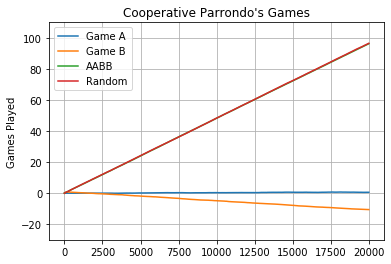

In [16]:
#combined plot

#load the numpy arrays
game_a_results = np.load('game_a_results_eps_0.npy')
game_b_results = np.load('game_b_results_eps_0.npy')
game_rand_results = np.load('game_rand_results_eps_0.npy')
game_aabb_results = np.load('game_aabb_results_eps_0.npy')

#plot
plt.plot(x_axis, game_a_results, label = 'Game A')
plt.plot(x_axis, game_b_results, label = 'Game B')
plt.plot(x_axis, game_aabb_results, label = 'AABB')
plt.plot(x_axis, game_rand_results, label = 'Random')
plt.ylabel('Capital')
plt.ylabel('Games Played')
plt.title("Cooperative Parrondo's Games")
plt.legend()
plt.ylim(-30, 110)
plt.grid()
plt.show()